/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

(10000, 32, 32)
显示原图 1
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_1
(10000, 32, 32)
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_2
(10000, 32, 32)
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_3
(10000, 32, 32)
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_4
(10000, 32, 32)
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_5
(10000, 32, 32)
(10000, 32, 32)
finished loadding CIFAR-10 data
training data shape: (50000, 32, 32)
training labels shape: (50000,)
test data shape: (10000, 32, 32)
test labels shape: (10000,)


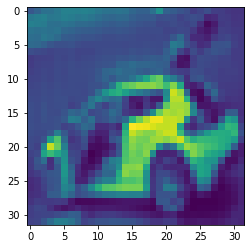

In [1]:
#rnn网络数据预处理
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import random
from time import time
#消除警告的包
import warnings
warnings.filterwarnings("ignore")

# 设置随机种子
random.seed(1)



def load_gray_CIFAR_batch(filename):
    with open(filename,'rb')as f:
        data_dict = pickle.load(f,encoding='bytes')
        images = data_dict[b'data']
        labels = data_dict[b'labels']
        
        #把元数据结构调整为：BCWH
        images = images.reshape(10000,3,32,32)
        gray_img = images.mean(1)
        print(gray_img.shape)
        #tesorflow 处理图像数据的结构为：BWHC
        #把通道数据c移动到最后一个维度
#         images = gray_img.transpose(0,2,3,1)
        labels = np.array(labels)
        return gray_img,labels
test_image,test_label = load_gray_CIFAR_batch('/root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/test_batch')
print('显示原图',test_label[6])
plt.imshow(test_image[6])

import os
def load_CIFAR_data(data_dir):
    images_train = []
    labels_train = []


    for i in range(5):
        # 循环读取，每一个文件的数据和标签名
        f = os.path.join(data_dir,'data_batch_%d'%(i+1))
        print('loading',f)
        image_batch,label_batch=load_gray_CIFAR_batch(f)
        images_train.append(image_batch)
        labels_train.append(label_batch)
        Xtrain=np.concatenate(images_train)
        Ytrain=np.concatenate(labels_train)
        del image_batch,label_batch
    Xtest,Ytest = load_gray_CIFAR_batch(os.path.join(data_dir,'test_batch'))
    print("finished loadding CIFAR-10 data")
    return Xtrain,Ytrain,Xtest,Ytest
data_dir = '/root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/'

Xtrain,Ytrain,Xtest,Ytest = load_CIFAR_data(data_dir)
print('training data shape:',Xtrain.shape)
print('training labels shape:',Ytrain.shape)
print('test data shape:',Xtest.shape)
print('test labels shape:',Ytest.shape)

2


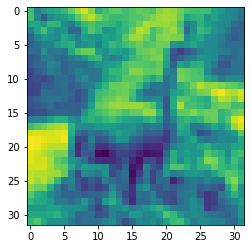

In [2]:
%matplotlib inline
plt.imshow(Xtrain[6])
print(Ytrain[6])

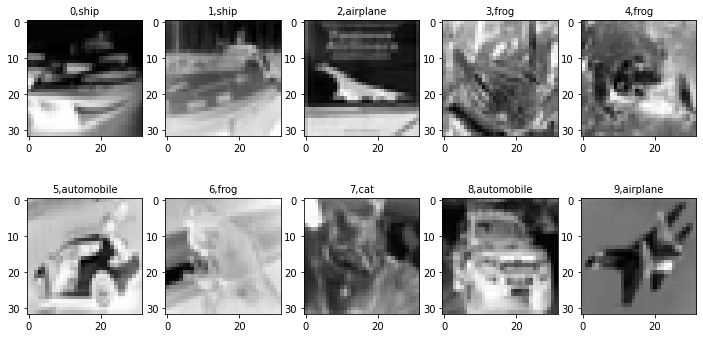

In [3]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
#定义显示图像数据以及对应标签的函数
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,6)
    if num > 10:
        num=10
    for i in range(0,num):
        ax=plt.subplot(2,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title = str(i)+','+label_dict[labels[idx]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10)
        idx+=1
    plt.show()
    
plot_images_labels_prediction(Xtest,Ytest,[],1,10)

In [4]:
Xtrain[0][0][0]
print(Xtrain[0][0][0])
Xtrain_normalize = Xtrain.astype('float32')/255.0
Xtest_normalize = Xtest.astype('float32')/255.0
Xtrain_normalize[0][0][0]
# print(Xtrain_normalize[0][0][0])

61.333333333333336


0.24052288

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
yy = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
encoder.fit(yy)
Ytrain_reshape = Ytrain.reshape(-1,1)
Ytrain_onehot = encoder.transform(Ytrain_reshape)
Ytest_reshape = Ytest.reshape(-1,1)
Ytest_onehot = encoder.transform(Ytest_reshape)

In [6]:
# def get_train_batch(number,batch_size):
#     return np.array(Xtrain_normalize[number*batch_size:(number+1)*batch_size]).reshape([-1,1024]),\
# np.array(Ytrain_onehot[number*batch_size:(number+1)*batch_size])
# x_1,y_1 = get_train_batch(1,10)
# print(x_1,y_1)
# print(x_1.shape,y_1.shape)


# x_2  = x_1[0]
# x_2.reshape([-1, 32, 32])
# # print('这是x_2',x_2)
# x_3 = tf.reshape(x_1, [-1, 32, 32])
# # # x_4 = np.reshape()
# with tf.Session() as tess:
#     print(sess.run(x_3))
#     print(x_3.shape)

In [7]:


epoch_list=[]
accuracy_list=[]
loss_list = []

lr = 1e-4
# 每个时刻的输入特征是28维的，就是每个时刻输入一行，一行有 28 个像素
input_size = 32
# 时序持续长度为28，即每做一次预测，需要先输入28行
timestep_size = 32
# 每个隐含层的节点数
hidden_size = 256
# LSTM layer 的层数
layer_num = 2
# 最后输出分类类别数量，如果是回归预测的话应该是 1
class_num = 10

# keep_prob = tf.placeholder(tf.float32, [])
_batch_size = tf.placeholder(tf.int32, [])
# x = tf.placeholder(tf.float32, [None, 784])
x = tf.placeholder('float',shape=[None,32,32],name='x')
y = tf.placeholder(tf.float32, [None, class_num],name='y')
 
##########################################################################搭建LSTM模型
 
# 把784个点的字符信息还原成 28 * 28 的图片
# 下面几个步骤是实现 RNN / LSTM 的关键
####################################################################
# **步骤1：RNN 的输入shape = (batch_size, timestep_size, input_size)
# x = tf.reshape(x, [-1, 32, 32])
 
stacked_rnn = []
for iiLyr in range(layer_num):
    stacked_rnn.append(tf.nn.rnn_cell.LSTMCell(num_units=hidden_size, state_is_tuple=True))
mlstm_cell = tf.nn.rnn_cell.MultiRNNCell(cells=stacked_rnn, state_is_tuple=True)

init_state = mlstm_cell.zero_state(_batch_size, dtype=tf.float32)

# **步骤6：方法一，调用 dynamic_rnn() 来让我们构建好的网络运行起来
# ** 当 time_major==False 时， outputs.shape = [batch_size, timestep_size, hidden_size]
# ** 所以，可以取 h_state = outputs[:, -1, :] 作为最后输出
# ** state.shape = [layer_num, 2, batch_size, hidden_size],
# ** 或者，可以取 h_state = state[-1][1] 作为最后输出
# ** 最后输出维度是 [batch_size, hidden_size]
outputs, state = tf.nn.dynamic_rnn(mlstm_cell, inputs=x, initial_state=init_state, time_major=False)
# outputs, state = tf.nn.dynamic_rnn(mlstm_cell, inputs=x,dtype=tf.float32,time_major=False)

h_state = outputs[:, -1, :] 
# h_state = outputs[:, -1, :]  # 或者 h_state = state[-1][1]
 
# *************** 为了更好的理解 LSTM 工作原理，我们把上面 步骤6 中的函数自己来实现 ***************
# 通过查看文档你会发现， RNNCell 都提供了一个 __call__()函数（见最后附），我们可以用它来展开实现LSTM按时间步迭代。
# **步骤6：方法二，按时间步展开计算
# outputs = list()
# state = init_state
# with tf.variable_scope('RNN'):
#     for timestep in range(timestep_size):
#         if timestep > 0:
#             tf.get_variable_scope().reuse_variables()
#         # 这里的state保存了每一层 LSTM 的状态
#         (cell_output, state) = mlstm_cell(x[:, timestep, : ], state)
# #         (cell_output, state) = mlstm_cell(x[:, timestep, : ])

#         print("我看你作妖到何时",cell_output,state)
#         outputs.append(cell_output)
# h_state = outputs[-1]
 
# 上面 LSTM 部分的输出会是一个 [hidden_size] 的tensor，我们要分类的话，还需要接一个 softmax 层
# 首先定义 softmax 的连接权重矩阵和偏置
# out_W = tf.placeholder(tf.float32, [hidden_size, class_num], name='out_Weights')
# out_bias = tf.placeholder(tf.float32, [class_num], name='out_bias')
# 开始训练和测试
W = tf.Variable(tf.truncated_normal([hidden_size, class_num], stddev=0.1), dtype=tf.float32)
bias = tf.Variable(tf.constant(0.1,shape=[class_num]), dtype=tf.float32)
y_pre = tf.nn.softmax(tf.matmul(h_state, W) + bias)

# def get_train_batch(number,batch_size):
#     return np.array(Xtrain_normalize[number*batch_size:(number+1)*batch_size]),\
# np.array(Ytrain_onehot[number*batch_size:(number+1)*batch_size])
def get_train_batch(number,batch_size):
    return np.array(Xtrain_normalize[number*batch_size:(number+1)*batch_size],dtype=float),\
np.array(Ytrain_onehot[number*batch_size:(number+1)*batch_size])

# 损失和评估函数
cross_entropy = -tf.reduce_mean(y * tf.log(y_pre))
train_op = tf.train.AdamOptimizer(lr).minimize(cross_entropy)
saver = tf.train.Saver()
correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess = tf.Session()
sess.run(tf.global_variables_initializer())

startTime =time()
for i in range(50001):
    batch_size = 1
    batch_x,batch_y = get_train_batch(i,batch_size)

    if (i+1)%100 == 0:
#         train_accuracy = sess.run(accuracy, feed_dict={
#             x:batch_x, y: batch_y, keep_prob: 1.0, batch_size: batch_size})
        loss,train_accuracy = sess.run([cross_entropy,accuracy], feed_dict={
        x:batch_x, y: batch_y,_batch_size:batch_size})
        epoch_list.append(i+1)
        loss_list.append(loss)
        accuracy_list.append(train_accuracy)
        # 已经迭代完成的 epoch 数: mnist.train.epochs_completed
        print("step %d, training accuracy %g" % ((i+1), train_accuracy))

    sess.run(train_op, feed_dict={x: batch_x, y: batch_y,_batch_size: batch_size})
    saver.save(sess,'/root/.ipython/profile_nbserver/cash_file/CIFAR10_2rnnts/cifar10_model.ckpt')
duration = time()-startTime
print('train finished takes:',duration)
 
# test_total_batch = int(len(Xtest_normalize)/batch_size)
# test_acc_sum = 0.0
# for i in range(test_total_batch):
#     test_image_batch = Xtest_normalize[i*batch_size:(i+1)*batch_size]
#     test_label_batch = Ytest_onehot[i*batch_size:(i+1)*batch_size]
#     test_batch_acc = sess.run(accuracy,feed_dict= {x:test_image_batch,y:test_label_batch})
#     test_acc_sum += test_batch_acc
# test_acc = float(test_acc_sum/test_total_batch)
# print('test accuracy:{:.6f}'.format(test_acc))



Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
step 100, training accuracy 1
step 200, training accuracy 0
step 300, training accuracy 0
step 400, training accuracy 0
step 500, training accuracy 0
step 600, training accuracy 0
step 700, training accuracy 0
step 800, training accuracy 0
step 900, training accuracy 0
step 1000, training accuracy 0
step 1100, training accuracy 1
step 1200, training accuracy 0
step 1300, training accuracy 0
step 1400

step 11400, training accuracy 1
step 11500, training accuracy 0
step 11600, training accuracy 0
step 11700, training accuracy 0
step 11800, training accuracy 0
step 11900, training accuracy 0
step 12000, training accuracy 0
step 12100, training accuracy 0
step 12200, training accuracy 0
step 12300, training accuracy 0
step 12400, training accuracy 1
step 12500, training accuracy 1
step 12600, training accuracy 0
step 12700, training accuracy 0
step 12800, training accuracy 1
step 12900, training accuracy 0
step 13000, training accuracy 1
step 13100, training accuracy 1
step 13200, training accuracy 1
step 13300, training accuracy 0
step 13400, training accuracy 0
step 13500, training accuracy 0
step 13600, training accuracy 0
step 13700, training accuracy 1
step 13800, training accuracy 0
step 13900, training accuracy 1
step 14000, training accuracy 0
step 14100, training accuracy 1
step 14200, training accuracy 0
step 14300, training accuracy 0
step 14400, training accuracy 0
step 145

step 37100, training accuracy 1
step 37200, training accuracy 1
step 37300, training accuracy 0
step 37400, training accuracy 0
step 37500, training accuracy 0
step 37600, training accuracy 0
step 37700, training accuracy 1
step 37800, training accuracy 1
step 37900, training accuracy 1
step 38000, training accuracy 0
step 38100, training accuracy 1
step 38200, training accuracy 0
step 38300, training accuracy 0
step 38400, training accuracy 0
step 38500, training accuracy 1
step 38600, training accuracy 1
step 38700, training accuracy 0
step 38800, training accuracy 1
step 38900, training accuracy 0
step 39000, training accuracy 0
step 39100, training accuracy 0
step 39200, training accuracy 1
step 39300, training accuracy 0
step 39400, training accuracy 0
step 39500, training accuracy 1
step 39600, training accuracy 0
step 39700, training accuracy 1
step 39800, training accuracy 0
step 39900, training accuracy 0
step 40000, training accuracy 1
step 40100, training accuracy 0
step 402

InvalidArgumentError: ConcatOp : Dimensions of inputs should match: shape[0] = [0,32] vs. shape[1] = [1,256]
	 [[node rnn/while/rnn/multi_rnn_cell/cell_0/lstm_cell/concat (defined at <ipython-input-7-6b53d466af8d>:44) ]]

Original stack trace for 'rnn/while/rnn/multi_rnn_cell/cell_0/lstm_cell/concat':
  File "/usr/lib64/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib64/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 597, in start
    self.io_loop.start()
  File "/usr/local/lib64/python3.6/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib64/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib64/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib64/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib64/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/usr/local/lib64/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/usr/local/lib64/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/usr/local/lib64/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 381, in dispatch_queue
    yield self.process_one()
  File "/usr/local/lib64/python3.6/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/usr/local/lib64/python3.6/site-packages/tornado/gen.py", line 714, in __init__
    self.run()
  File "/usr/local/lib64/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib64/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib64/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib64/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-6b53d466af8d>", line 44, in <module>
    outputs, state = tf.nn.dynamic_rnn(mlstm_cell, inputs=x, initial_state=init_state, time_major=False)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 324, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/rnn.py", line 707, in dynamic_rnn
    dtype=dtype)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/rnn.py", line 916, in _dynamic_rnn_loop
    swap_memory=swap_memory)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 3501, in while_loop
    return_same_structure)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 3012, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2937, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 3456, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/rnn.py", line 884, in _time_step
    (output, new_state) = call_cell()
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/rnn.py", line 870, in <lambda>
    call_cell = lambda: cell(input_t, state)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/rnn_cell_impl.py", line 248, in __call__
    return super(RNNCell, self).__call__(inputs, state)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 537, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 634, in __call__
    outputs = call_fn(inputs, *args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/autograph/impl/api.py", line 146, in wrapper
    ), args, kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/autograph/impl/api.py", line 446, in converted_call
    return _call_unconverted(f, args, kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/autograph/impl/api.py", line 253, in _call_unconverted
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/rnn_cell_impl.py", line 1719, in call
    cur_inp, new_state = cell(cur_inp, cur_state)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/rnn_cell_impl.py", line 385, in __call__
    self, inputs, state, scope=scope, *args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 537, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 634, in __call__
    outputs = call_fn(inputs, *args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/autograph/impl/api.py", line 146, in wrapper
    ), args, kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/autograph/impl/api.py", line 446, in converted_call
    return _call_unconverted(f, args, kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/autograph/impl/api.py", line 253, in _call_unconverted
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/rnn_cell_impl.py", line 1027, in call
    array_ops.concat([inputs, m_prev], 1), self._kernel)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1299, in concat
    return gen_array_ops.concat_v2(values=values, axis=axis, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1256, in concat_v2
    "ConcatV2", values=values, axis=axis, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
#可视化损失
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.legend(['loss'],loc='upper right')


#可视化准确率
plt.plot(epoch_list,accuracy_list,label='accuracy')
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.1,1)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.legend()
plt.show()


In [ ]:
print(accuracy_list,loss_list)

test accuracy:0.386600
[4 8 8 8 4 6 6 4 5 9 6 1 6 7 9 8 7 4 8 7 9 0 4 1 2 6 6 7 9 6 3 7 4 3 9 1 2
 9 6 7 8 2 3 4 8 9 6 6 4 6]


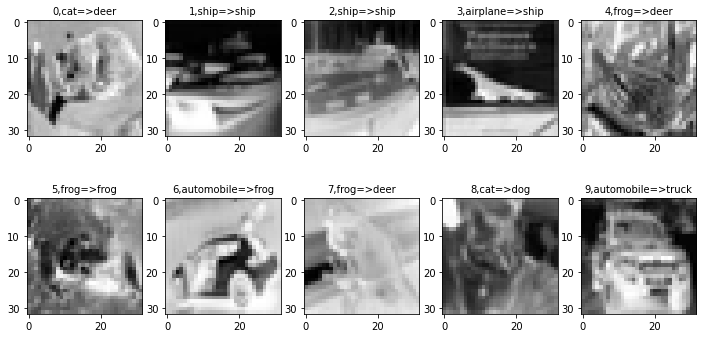

In [8]:
batch_size = 50
test_total_batch = int(len(Xtest_normalize)/batch_size)
test_acc_sum = 0.0
for i in range(test_total_batch):
    test_image_batch = Xtest_normalize[i*batch_size:(i+1)*batch_size]
    test_label_batch = Ytest_onehot[i*batch_size:(i+1)*batch_size]
    test_batch_acc = sess.run(accuracy,feed_dict= {x:test_image_batch,y:test_label_batch,_batch_size: batch_size})
    test_acc_sum += test_batch_acc
test_acc = float(test_acc_sum/test_total_batch)
print('test accuracy:{:.6f}'.format(test_acc))


test_pred = sess.run(y_pre,feed_dict={x:Xtest_normalize[:50],_batch_size: batch_size})
prediction_result =sess.run(tf.argmax(test_pred,1))
print(prediction_result)


plot_images_labels_prediction(Xtest,Ytest,prediction_result,0,50)


In [ ]:

def predict(sess,inputs):
#     preds = sess.run('pred:0', feed_dict={'X:0': inputs}) 
    test_pred = sess.run(y_pre,feed_dict={x:inputs[:10],_batch_size: 10})
    #部署clipper时用这种写法
#     test_pred = sess.run('pred:0',feed_dict={'x:0':inputs[:50]})

    prediction_result =sess.run(tf.argmax(test_pred,1))
    # `X` is used, it must be defined in the model with that name explicitly!
    return prediction_result
predict(sess,Xtest_normalize)

数据类型为啥不对啊  源代码 运行的是  [[1.1,2.0]]转换成array([[1.1,2.0]], dtype=float32)类的数据类型 但我无论怎么转换都只能得到 [[1.1,2.0]]形式的数据类型  为什么 啊啊啊啊啊？？
[[1.1,2.0]]转换成array([[1.1,2.0]], dtype=float32)

卡了我两天 定义的 常规变量 不要和tensor变量重名 batch_size 和整形 batch_size 重名了  运行初始化 定义时 运行的是 plachholer   


有这个问题 不知道怎么解决
https://blog.csdn.net/junjie20082008/article/details/85762266

批次最多设计为10 训练5000次会梯度爆炸